In [908]:
import time
import numpy as np
from numpy.linalg import inv
import numpy.linalg as npl
import numpy.random as npr
from scipy import linalg
from scipy.sparse import diags
import pandas as pd

import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt

In [909]:
from sympy import *
import sympy as sym
sym.init_printing()
from IPython.display import display, Math

In [910]:
# nxn random matrix
#A = npr.rand(n, n)
#b = np.ones((n))


n = 4

A = np.random.randint(10, size=(n, n))
b = np.random.randint(10, size=(n))

In [911]:
A = ([ [1,2,1],
       [2,5,2],
       [1,2,10]])

b = np.ones((3))

true_sol = npl.solve(A, b)
print(true_sol)

[ 3. -1.  0.]


In [912]:
A= np.array([[10,-1,2,0],
            [-1,11,-1,3],
            [2,-1,10,-1],
             [0,3,-1,8]])
b = np.array([6,25,-11,15])
true_sol = npl.solve(A, b)

true_sol

array([ 1.,  2., -1.,  1.])

In [913]:
def gauss_seidel(A, b, iter=30, error=10e-4):
    start = time.time()
    erg = []
    [m, n] = np.shape(A)
    x = np.zeros((m))
    x0 = x.copy()
    R = np.triu(A,k=1)
    L = np.tril(A,k=-1)
    D = np.diag(np.diag(A))

    B = -(np.linalg.inv(D + L)) @ R
    g =   (np.linalg.inv(D + L)) @ b

    for k in range(iter):
        erg.append(x)
        x = np.dot(B,x)+g

        var = abs(x0-x)
        for el in var:
            if el <= error:
                print(f"Jacobi nach {k} -Iterationen fertig.")
                end = time.time()
                gauss_seidel_time = '{:5.4f}s'.format(end-start)
                return erg, gauss_seidel_time, k
        x0 = x.copy()




    end = time.time()
    gauss_seidel_time =  '{:5.4f}s'.format(end-start)
    print('Gauß/Seidel: ', gauss_seidel_time)
    return erg, gauss_seidel_time

In [914]:
def gauss_elimination(A,b):
    from scipy.linalg import lu_factor, lu_solve
    start = time.time()
    lu, piv = lu_factor(A)
    x = lu_solve((lu, piv), b)

    end = time.time()
    gauss_elim_time = '{:5.4f}s'.format(end-start)

    #print("piv:", piv)
    #print("lu:", lu)

    return x, gauss_elim_time

In [915]:
def jacobi(A, b, iter=30, error=10e-4):
    start = time.time()
    erg = []
    [m, n] = np.shape(A)
    x = np.zeros((m))
    x0 = x.copy()

    D = np.diag(np.diag(A))
    D_inv = np.linalg.inv(D)
    B = np.dot(D_inv,D - A)
    g = np.dot(D_inv,b)

    for k in range(iter):
        erg.append(x)
        x = np.dot(B,x)+g

        var = abs(x0-x)
        for el in var:
            if el <= error:
                print(f"Jacobi nach {k} -Iterationen fertig.")
                end = time.time()
                jacobi_time = '{:5.4f}s'.format(end-start)
                return erg, jacobi_time, k
        x0 = x.copy()


    end = time.time()
    jacobi_time = '{:5.4f}s'.format(end-start)

    print('Jacobi Time: ',jacobi_time)
    return erg, jacobi_time

In [916]:
def sor(A, b, w=0, iter=30):
    # w = (0,2)
    start = time.time()
    erg = []
    [m, n] = np.shape(A)
    x = np.zeros((m))
    R = np.triu(A,k=1)  # C2
    L = np.tril(A,k=-1) # C1
    D = np.diag(np.diag(A))

    for k in range(iter):
        erg.append(x)
        x = -(np.linalg.inv(D+np.dot(w,L))) @ (np.dot(w,R) - np.dot(1-w,D)) @ x +   np.dot( w,np.linalg.inv(D + np.dot(w,L))) @ b

    end = time.time()
    sor_time = '{:5.4f}s'.format(end-start)
    print('SOR Time: ',sor_time)
    return erg, sor_time

In [917]:
true_sol = npl.solve(A, b)

iter = 20
jac_erg, jacobi_time, k_jacobi = jacobi(A,b, iter=iter)
gauss_seidel_erg, gauss_seidel_time, k_gauss_seidel = gauss_seidel(A, b, iter=iter)
sor_erg, sor_time = sor(A, b, w=2, iter=iter)

gauss_elim_erg, gauss_elim_time = gauss_elimination(A,b)

jac_erg.append(true_sol)
gauss_seidel_erg.append(true_sol)
sor_erg.append(true_sol)

time_df = pd.DataFrame(columns=["Jacobi", "Gauss Seidel", "SOR", "Gauss Eliminierung"])
time_df.loc[0]=[ jacobi_time, gauss_seidel_time, sor_time, gauss_elim_time ]
time_df.index = ["Zeit (sek)"]


time_df

Jacobi nach 8 -Iterationen fertig.
Jacobi nach 4 -Iterationen fertig.
SOR Time:  0.0021s


,Jacobi,Gauss Seidel,SOR,Gauss Eliminierung
Zeit (sek),0.0000s,0.0010s,0.0021s,0.0005s


In [918]:
l1, l2, l3, la = symbols("x1 x2 x3 x")
l = Matrix([l1,l2,l3])
r = Matrix(b)
a = Matrix(A)
display(Math('\ \\text{  }%s   \\text{*} %s \\text{= } %s' % (sym.latex(sym.simplify(a)) , (sym.latex(sym.simplify(l))), (sym.latex(sym.simplify(r)))  ))   )

<IPython.core.display.Math object>

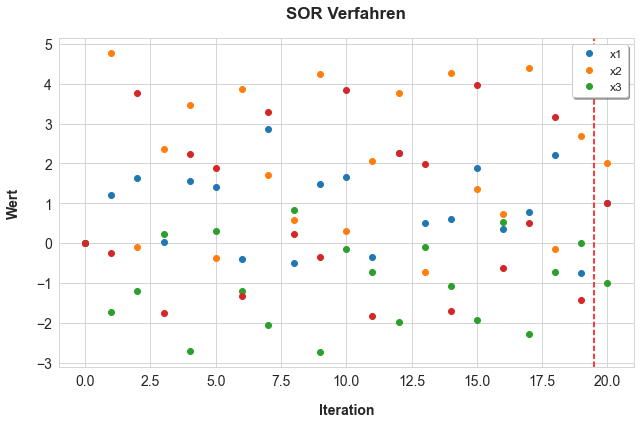

In [919]:
plt.figure(figsize=(9,6))
plt.plot(sor_erg,linestyle='',marker='o')
plt.axvline(x=iter-0.5,linestyle='--',c='red')

plt.title('SOR Verfahren', fontweight='bold', fontsize=17, pad=20)

plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
plt.legend(labels = ['x1','x2','x3'],frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid(True)
plt.show()

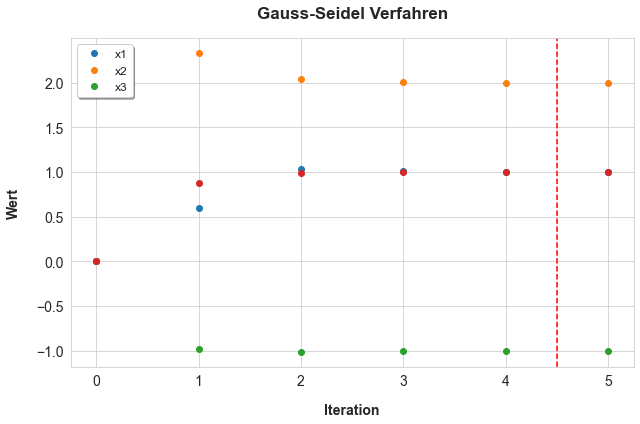

In [920]:
plt.figure(figsize=(9,6))
plt.plot(gauss_seidel_erg,linestyle='',marker='o')
plt.axvline(x=k_gauss_seidel+0.5,linestyle='--',c='red')

plt.title('Gauss-Seidel Verfahren', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
plt.legend(labels = ['x1','x2','x3'],frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid(True)
plt.show()

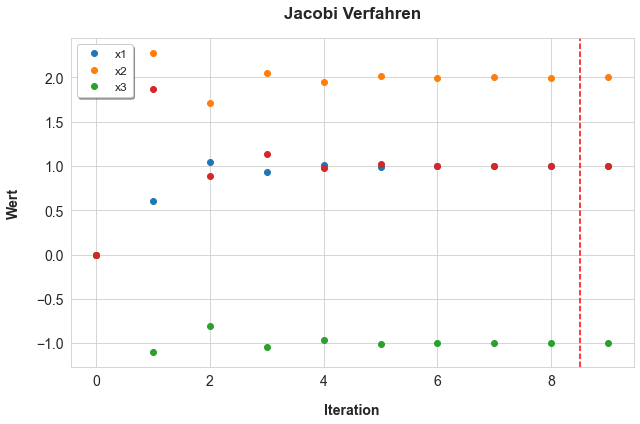

In [921]:
plt.figure(figsize=(9,6))
plt.plot(jac_erg,linestyle='',marker='o')
plt.axvline(x=k_jacobi+0.5,linestyle='--',c='red')

plt.title('Jacobi Verfahren', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
plt.legend(labels = ['x1','x2','x3'],frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid(True)
plt.show()

Ideen: LGS von n = 2 bis n = 6 mio

Plot: Fehler, Wert,